In [1]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(os.getcwd())

/Users/philipsteffen/code/vivekptl9/Anaemia_Classification/notebooks


In [3]:
df = pd.read_csv('/Users/philipsteffen/code/vivekptl9/Anaemia_Classification/image_data_references.csv', delimiter =';')
df.head()

,File_Name,Status
0,010319-05r1-S-A-S1-20190816160305,0
1,060319-02-S-A-S1-20190816170548,0
2,101017-04-S-A-S1-20190510101904,0
3,101017-07-S-A-S1-20190510112330,1
4,101017-09-S-A-S1-20190510123456,1


In [4]:
df.set_index('File_Name', inplace=True)

In [5]:
df.head()

,Status
File_Name,
010319-05r1-S-A-S1-20190816160305,0
060319-02-S-A-S1-20190816170548,0
101017-04-S-A-S1-20190510101904,0
101017-07-S-A-S1-20190510112330,1
101017-09-S-A-S1-20190510123456,1


In [6]:
type(df.loc['220819-11'][0])

numpy.int64

In [7]:
picture_path_1 = '/Users/philipsteffen/code/phelph/blood_pictures/sickle3-edofed'
picture_path_2 = '/Users/philipsteffen/code/phelph/blood_pictures/sickle-edofed'
path_list= [picture_path_1, picture_path_2]

In [19]:
files_all = []
files_sick = []
files_healthy = []
dirs = []
counter = 0
labels = []

for picture_path in path_list:
    for root, dirs, files in os.walk(picture_path):
        for file in files:
            if file[-4:] == 'tiff':
                try:
                    if df.loc[root.split('/')[-1]][0] == 0:
                        files_all.append(root +'/'+ file)
                        labels.append(0)
                       
                    else:
                        files_all.append(root +'/'+ file)
                        labels.append(1)
                        
                except:
                    #print('error')
                    counter += 1
                    

In [ ]:
len(files_healthy) + len(files_sick) 

1878

In [17]:
len(files_all)

1878

In [20]:
len(labels)

1878

In [ ]:
pic_array = np.asarray(files_all[0])
pic_array

array('/Users/philipsteffen/code/phelph/blood_pictures/sickle3-edofed/280120-58/pos001_EDOF_DENISOVAN_RGB.tiff',
      dtype='<U103')

<class 'numpy.ndarray'>


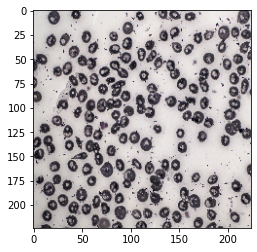

In [22]:
image1 = files_all[0]
img = plt.imread(image1)
img=img/255.
img = cv2.resize(img, dsize=(224,224))
plt.imshow(img);
print(type(img))

In [23]:
files_resized = []
for file in files_all:
   img = plt.imread(file)
   img=img/255.
   img = cv2.resize(img, dsize=(224,224))
   files_resized.append(img)

In [ ]:
#sick_resized = []
#for file in files_sick:
#    img = plt.imread(file)
#    img=img/255.
#    img = cv2.resize(img, dsize=(224,224))
#    sick_resized.append(img)

In [ ]:
# healthy_resized = []
# for file in files_healthy:
#     img = plt.imread(file)
#     img=img/255.
#     img = cv2.resize(img, dsize=(224,224))
#     healthy_resized.append(img)

In [ ]:
# np.save('healthy', healthy_resized)
# np.save('sick', sick_resized)

In [ ]:
# with open('healthy.npy', 'rb') as f:
#     healthy = np.load(f)
# healthy[0].shape


(224, 224, 3)

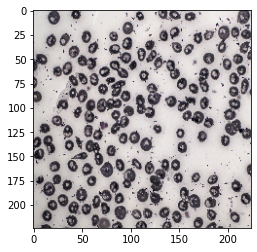

In [24]:
plt.imshow(files_resized[0]);

In [25]:
np.save('pictures_array', files_resized)
np.save('labels_array', labels)